# Statistical Simulations 

In this notebook we will go through some methods that can be used for simulating data generation processes. Here, to simulate different types of random variables we will be utilizing nothing fancy but some standard functions from `numpy.random` module. 

For more information refer to the official docs:
https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random

Note that this notebook was inspired by DataCamp course on Statistical Simulations.

## Simulations

* Allows us to model real-world events. 

**Simulation steps:**

1. Define possible outcomes for random variables
2. Assign probabilities.
3. Define relationships between random variables.
4. Get multriple outcomes by repeated random sampling
5. Analyze sample outcomes.


Discrete Probability Distributions

* Poisson
* Binomial

In [2]:
import numpy as np

In [3]:
## Poisson
# Initialize seed and parameters
np.random.seed(123) 
lam, size_1, size_2 = 5, 3, 1000  

# Draw samples & calculate absolute difference between lambda and sample mean
samples_1 = np.random.poisson(lam, size_1)
samples_2 = np.random.poisson(lam, size_2)
answer_1 = abs(lam - np.mean(samples_1))
answer_2 = abs(lam - np.mean(samples_2))

print("|Lambda - sample mean| with {} samples is {} and with {} samples is {}. ".format(size_1, answer_1, size_2, answer_2))


|Lambda - sample mean| with 3 samples is 0.33333333333333304 and with 1000 samples is 0.07699999999999996. 


In [4]:
# shuffling the deck of cards

deck_of_cards = [('Diamond', 9), ('Spade', 9), ('Spade', 4), ('Club', 11), ('Club', 5), ('Heart', 11), ('Club', 8), ('Club', 0), ('Diamond', 4), ('Heart', 0), ('Heart', 5), ('Heart', 10), ('Spade', 10), ('Heart', 8), ('Heart', 12), ('Spade', 5), ('Spade', 11), ('Heart', 1), ('Heart', 6), ('Spade', 3), ('Diamond', 1), ('Spade', 0), ('Diamond', 5), ('Club', 2), ('Spade', 1), ('Diamond', 10), ('Heart', 7), ('Club', 7), ('Diamond', 11), ('Heart', 3), ('Club', 10), ('Diamond', 7), ('Heart', 4), ('Club', 3), ('Diamond', 8), ('Club', 1), ('Diamond', 12), ('Club', 12), ('Diamond', 0), ('Diamond', 2), ('Heart', 9), ('Spade', 6), ('Spade', 7), ('Club', 9), ('Diamond', 3), ('Club', 6), ('Club', 4), ('Spade', 12), ('Spade', 8), ('Spade', 2), ('Heart', 2), ('Diamond', 6)]

# Shuffle the deck
np.random.shuffle(deck_of_cards)

# Print out the top three cards
card_choices_after_shuffle = deck_of_cards[:3]
print(card_choices_after_shuffle)


[('Club', 12), ('Heart', 5), ('Heart', 9)]


**Throwing a fair die**

Once you grasp the basics of designing a simulation, you can apply it to any system or process. Next, we will learn how each step is implemented using some basic examples.

As we have learned, simulation involves repeated random sampling. The first step then is to get one random sample. Once we have that, all we do is repeat the process multiple times. This exercise will focus on understanding how we get one random sample. We will study this in the context of throwing a fair six-sided die.

By the end of this exercise, you will be familiar with how to implement the first two steps of running a simulation - defining a random variable and assigning probabilities.

In [7]:
# Define die outcomes and probabilities
die, probabilities, throws = [1,2,3,4,5,6], [1./6.,1./6.,1./6.,1./6.,1./6.,1./6.], 1

# Use np.random.choice to throw the die once and record the outcome
outcome = np.random.choice(die, size=1, p=probabilities)
print("Outcome of the throw: {}".format(outcome[0]))

Outcome of the throw: 3


In [ ]:
# Initialize number of dice, simulate & record outcome
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(die, size=2, p=probabilities) 

# Win if the two dice show the same number
if outcomes[0] == outcomes[1]: 
    answer = 'win' 
else:
    answer = 'lose'

print("The dice show {} and {}. You {}!".format(outcomes[0], outcomes[1], answer))

In [ ]:
# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
sims, wins = 100, 0

for i in range(sims):
    outcomes = np.random.choice(die, size=2, p=probabilities)  
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0]==outcomes[1]: 
        wins = wins + 1 

print("In {} games, you win {} times".format(sims, wins))

We will use simulations to figure out whether or not we want to buy a lottery ticket. Suppose you have the opportunity to buy a lottery ticket which gives you a shot at a grand prize of 10,000. 
Since there are 1000 tickets in total, your probability of winning is 1 in 1000. Each ticket costs 10. Let's use our understanding of basic simulations to first simulate one drawing of the lottery.

In [8]:
# Pre-defined constant variables
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000

# Probability of winning
chance_of_winning = 1/1000

# Simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probability = [1-chance_of_winning, chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)

print("Outcome of one drawing of the lottery is {}".format(outcome))

Outcome of one drawing of the lottery is [-10]


Repeating the process gives us multiple outcomes. We can think of this as multiple universes where the same lottery drawing occurred. We can then determine the average winnings across all these universes. If the average winnings are greater than what we pay for the ticket then it makes sense to buy it, otherwise, we might not want to buy the ticket.

This is typically how simulations are used for evaluating business investments. After completing this exercise, you will have the basic tools required to use simulations for decision-making.

In [ ]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-10,10000-10]
probs = [1-chance_of_winning,chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = outcomes.mean()
print("Average payoff from {} simulations = {}".format(size, answer))

Calculating a break-even lottery price
Simulations allow us to ask more nuanced questions that might not necessarily have an easy analytical solution. Rather than solving a complex mathematical formula, we directly get multiple sample outcomes. We can run experiments by modifying inputs and studying how those changes impact the system. For example, once we have a moderately reasonable model of global weather patterns, we could evaluate the impact of increased greenhouse gas emissions.

In the lottery example, we might want to know how expensive the ticket needs to be for it to not make sense to buy it. To understand this, we need to modify the ticket cost to see when the expected payoff is negative.

grand_prize, num_tickets, and chance_of_winning are loaded in the environment.

In [9]:
# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 3000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 6


## Simulations for Probability Estimation

Steps:

1. Construct sample space or population
2. Determine how to simulate one outcome
3. Determine rule for success
4. sample repeatedly and count successes
5. Calculate frequency of successes to estimate probability


In [11]:
4/52 + 13/52 - 1/52


0.3076923076923077

Two of a kind
Now let's use simulation to estimate probabilities. Suppose you've been invited to a game of poker at your friend's home. In this variation of the game, you are dealt five cards and the player with the better hand wins. You will use a simulation to estimate the probabilities of getting certain hands. Let's work on estimating the probability of getting at least two of a kind. Two of a kind is when you get two cards of different suites but having the same numeric value (e.g., 2 of hearts, 2 of spades, and 3 other cards).

By the end of this exercise, you will know how to use simulation to calculate probabilities for card games.

In [ ]:
# Shuffle deck & count card occurrences in the hand
n_sims, two_kind = 10000, 0
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for [suite, numeric_value] in hand:
        # Count occurrences of each numeric value
        cards_in_hand[numeric_value] = cards_in_hand.get(numeric_value, 0) + 1
    
    # Condition for getting at least 2 of a kind
    if np.max(list(cards_in_hand.values())) >=2: 
        two_kind += 1

print("Probability of seeing at least two of a kind = {} ".format(two_kind/n_sims))

**Game of thirteen**

A famous French mathematician Pierre Raymond De Montmart, who was known for his work in combinatorics, proposed a simple game called as Game of Thirteen. You have a deck of 13 cards, each numbered from 1 through 13. Shuffle this deck and draw cards one by one. A coincidence is when the number on the card matches the order in which the card is drawn. For instance, if the 5th card you draw happens to be a 5, it's a coincidence. You win the game if you get through all the cards without any coincidences. Let's calculate the probability of winning at this game using simulation.

By completing this exercise, you will further strengthen your ability to cast abstract problems into the simulation framework for estimating probabilities.

* For each drawing, draw all the cards in deck without replacement and assign to draw.
* Check if there are any coincidences in the draw and, if there are, increment the coincidences counter by 1.
* Calculate winning probability as the fraction of games without any coincidences and use prob_of_winning to print your results.

In [11]:
# Pre-set constant variables
deck, sims, coincidences = np.arange(1, 14), 10000, 0

for i in range(sims):
    # Draw all the cards without replacement to simulate one game
    draw = np.random.choice(deck, size=13, replace=False)
    # Check if there are any coincidences
    coincidence = (draw == list(np.arange(1, 14))).any()
    if coincidence == True: 
        coincidences += 1

# Calculate probability of winning
prob_of_winning = (10000 - coincidences)/10000
print("Probability of winning = {}".format(prob_of_winning))

Probability of winning = 0.359


### The conditional urn

As we've learned, conditional probability is defined as the probability of an event given another event. To illustrate this concept, let's turn to an urn problem.

We have an urn that contains 7 white and 6 black balls. Four balls are drawn at random. We'd like to know the probability that the first and third balls are white, while the second and the fourth balls are black.

Upon completion, you will learn to manipulate simulations to calculate simple conditional probabilities.

Instructions

- Initialize the counter success to 0 and sims to 5000.
- Define a list, urn, with 7 white balls ('w') and 6 black balls ('b').
- Draw 4 balls without replacement and check to see if the first and third are white and second and fourth are black.
- Increment success if the above criterion is met.

In [13]:
# Initialize success, sims and urn
success, sims = 0, 5000
urn = ['w' for i in range(7)] + ['b' for i in range(6)]

for _ in range(sims):
    # Draw 4 balls without replacement
    draw = np.random.choice(urn, replace=False, size=4)
    # Count the number of successes
    if (draw[0]=='w') & (draw[2]=='w') & (draw[1]=='b')& (draw[3]=='b'): 
        success +=1

print("Probability of success = {}".format(success/sims))

Probability of success = 0.076


## Birthday problem

Now we'll use simulation to solve a famous probability puzzle - the birthday problem. It sounds quite straightforward - How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?

With 366 people in a 365-day year, we are 100% sure that at least two have the same birthday, but we only need to be 50% sure. Simulation gives us an elegant way of solving this problem.

Upon completion of this exercise, you will begin to understand how to cast problems in a simulation framework.

- Initialize the sample space days which is an array from 1 to 365.
- Define a function birthday_sim() that takes one input people and returns the probability that at least two share the same birthday. Set size of draw to number of people.

In [14]:
# Draw a sample of birthdays & check if each birthday is unique
days = [i for i in range(1,366)]
people = 2

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for i in range(sims):
        draw = np.random.choice(days, size=people, replace=True)
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims
    return out

In [15]:
birthday_sim(people)

0.0020000000000000018

In [16]:
# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 23 people, there's a 50% chance that two share a birthday.


## Full house

Let's return to our poker game. Last time, we calculated the probability of getting at least two of a kind. This time we are interested in a full house. A full house is when you get two cards of different suits that share the same numeric value and three other cards that have the same numeric value (e.g., 2 of hearts & spades, jacks of clubs, diamonds, & spades).

Thus, a full house is the probability of getting exactly three of a kind conditional on getting exactly two of a kind of another value. Using the same code as before, modify the success condition to get the desired output. This exercise will teach you to estimate conditional probabilities in card games and build your foundation in framing abstract problems for simulation.


- Shuffle deck_of_cards.
- Utilize a dictionary with .get() to count the number of occurrences of each card in the hand.
- Increment the counter full_house when there is a full house in the hand (2 of one kind, 3 of the other).

In [24]:
deck = [('Heart', 0), ('Heart', 1), ('Heart', 2), ('Heart', 3), ('Heart', 4), ('Heart', 5), ('Heart', 6), ('Heart', 7), ('Heart', 8), ('Heart', 9), ('Heart', 10), ('Heart', 11), ('Heart', 12), ('Club', 0), ('Club', 1), ('Club', 2), ('Club', 3), ('Club', 4), ('Club', 5), ('Club', 6), ('Club', 7), ('Club', 8), ('Club', 9), ('Club', 10), ('Club', 11), ('Club', 12), ('Spade', 0), ('Spade', 1), ('Spade', 2), ('Spade', 3), ('Spade', 4), ('Spade', 5), ('Spade', 6), ('Spade', 7), ('Spade', 8), ('Spade', 9), ('Spade', 10), ('Spade', 11), ('Spade', 12), ('Diamond', 0), ('Diamond', 1), ('Diamond', 2), ('Diamond', 3), ('Diamond', 4), ('Diamond', 5), ('Diamond', 6), ('Diamond', 7), ('Diamond', 8), ('Diamond', 9), ('Diamond', 10), ('Diamond', 11), ('Diamond', 12)]


In [26]:
#Shuffle deck & count card occurrences in the hand
n_sims, full_house, deck_of_cards = 50000, 0, deck.copy() 
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use .get() method to count occurrences of each card
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
        
    # Condition for getting full house
    condition = (max(cards_in_hand.values()) ==3) & (min(cards_in_hand.values())==2)
    if condition: 
        full_house +=1
print("Probability of seeing a full house = {}".format(full_house/n_sims))

Probability of seeing a full house = 0.00146


## Data Generating Process

### Driving test

Through the next exercises, we will learn how to build a data generating process (DGP) through progressively complex examples.

In this exercise, you will simulate a very simple DGP. Suppose that you are about to take a driving test tomorrow. Based on your own practice and based on data you have gathered, you know that the probability of you passing the test is 90% when it's sunny and only 30% when it's raining. Your local weather station forecasts that there's a 40% chance of rain tomorrow. Based on this information, you want to know what is the probability of you passing the driving test tomorrow.

This is a simple problem and can be solved analytically. Here, you will learn how to model a simple DGP and see how it can be used for simulation.

In [68]:
sims, outcomes, p_rain, p_pass = 1000, [], 0.40, {'sun':0.9, 'rain':0.3}

def test_outcome(p_rain):  
    # Simulate whether it will rain or not
    weather = np.random.choice(['rain', 'sun'], p=[p_rain, 1 - p_rain])
    # Simulate and return whether you will pass or fail
    test_result = np.random.choice(['pass', 'fail'], p=[p_pass[weather],1-p_pass[weather]])
    return test_result

In [42]:
test_outcome(p_rain)

'pass'

In [ ]:
for i in range(sims):
    outcomes.append(test_outcome(p_rain))

# Calculate fraction of outcomes where you pass
pass_outcomes_frac = outcomes.count('pass')/len(outcomes)
print("Probability of Passing the driving test = {}".format(pass_outcomes_frac))


## National elections
This exercise will give you a taste of how you can model a DGP at different levels of complexity.

Consider national elections in a country with two political parties - Red and Blue. This country has 50 states and the party that wins the most states wins the elections. You have the probability  of Red winning in each individual state and want to know the probability of Red winning nationally.

Let's model the DGP to understand the distribution. Suppose the election outcome in each state follows a binomial distribution with probability  such that  indicates a loss for Red and  indicates a win. We then simulate a number of election outcomes. Finally, we can ask rich questions like what is the probability of Red winning less than 45% of the states?

- Simulate one election using np.random.binomial() with p = probs and n=1. Assign it to election.
- Append the average of Red's wins in election to outcomes.
- Calculate the fraction of outcomes where Red won less than 45% of the states. Save it as prob_red_wins and use it to print your results.

In [46]:
p =[0.52076814, 0.67846401, 0.82731745, 0.64722761, 0.03665174, 0.17835411
 ,0.75296372 ,0.22206157, 0.72778372, 0.28461556, 0.72545221, 0.106571
 ,0.09291364, 0.77535718, 0.51440142, 0.89604586, 0.39376099, 0.24910244
 ,0.92518253, 0.08165597, 0.4212476,  0.74123879, 0.2479099,  0.46125805
 ,0.19584491, 0.24440482, 0.349916,   0.80224624, 0.80186664, 0.82968251
 ,0.91178779, 0.51739059, 0.67338858, 0.15675863, 0.37772308, 0.77134621
 ,0.71727114, 0.92700912, 0.28386132, 0.25502498, 0.30081506, 0.19724585
 ,0.29129564, 0.56623386, 0.97681039, 0.96263926, 0.0548948,  0.14092758
 ,0.54739446, 0.54555576]

np.random.binomial(p = p, n = 1).mean()

0.42

In [78]:
outcomes, sims, probs = [], 1000, p

for i in range(sims):
    # Simulate elections in the 50 states
    election = np.random.binomial(p = probs, n = 1)
    # Get average of Red wins and add to `outcomes`
    outcomes.append(election.mean())

# Calculate probability of Red winning in less than 45% of the states
prob_red_wins = len([i for i in outcomes if i<0.45])/len(outcomes)
print("Probability of Red winning in less than 45% of the states = {}".format(prob_red_wins))

Probability of Red winning in less than 45% of the states = 0.201


## Fitness goals

Let's model how activity levels impact weight loss using modern fitness trackers. On days when you go to the gym, you average around 15k steps, and around 5k steps otherwise. You go to the gym 40% of the time. Let's model the step counts in a day as a Poisson random variable with a mean  dependent on whether or not you go to the gym.

For simplicity, let’s say you have an 80% chance of losing 1lb and a 20% chance of gaining 1lb when you get more than 10k steps. The probabilities are reversed when you get less than 8k steps. Otherwise, there's an even chance of gaining or losing 1lb. Given all this information, find the probability of losing weight in a month.

- Simulate steps as a Poisson random variable for a given day based on the value of lam.
- Set prob to [0.2, 0.8] if steps > 10000 or to [0.8, 0.2] if steps < 8000. Sum up all the weight lost or gained in a month stored in w.
- Calculate and print the fraction of simulations where total weight for a month in outcomes is less than 0. Save as weight_loss_outcomes_frac and use that to print your results.

In [85]:
# Simulate steps & choose prob 
days = 50

for i in range(sims):
    w = []
    for i in range(days):
        lam = np.random.choice([5000, 15000], p=[0.6, 0.4], size=1)
        steps = np.random.poisson(lam)
        if steps > 10000: 
            prob = [0.2, 0.8]
        elif steps < 8000: 
            prob = [0.8, 0.2]
        else:
            prob = [0.5, 0.5]
        w.append(np.random.choice([1, -1], p=prob))
    outcomes.append(sum(w))

# Calculate fraction of outcomes where there was a weight loss
weight_loss_outcomes_frac = len([i for i in outcomes if i<0])/len(outcomes)
print("Probability of Weight Loss = {}".format(weight_loss_outcomes_frac))

Probability of Weight Loss = 0.177


## eCommerce Ad Simulation

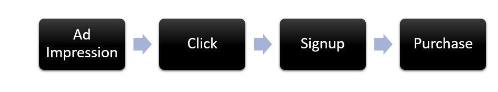

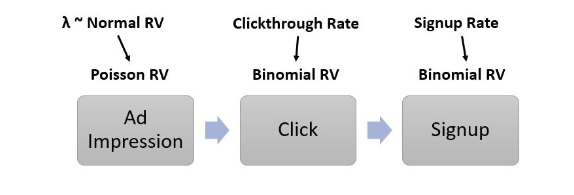

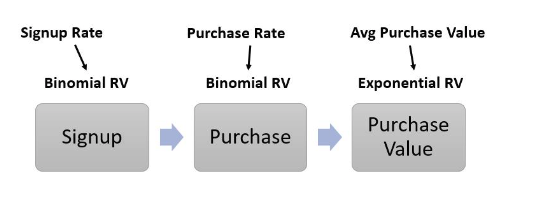

## Sign up Flow

We will now model the DGP of an eCommerce ad flow starting with sign-ups.

On any day, we get many ad impressions, which can be modeled as Poisson random variables (RV). You are told that  is normally distributed with a mean of 100k visitors and standard deviation 2000.

During the signup journey, the customer sees an ad, decides whether or not to click, and then whether or not to signup. Thus both clicks and signups are binary, modeled using binomial RVs. What about probability  of success? Our current low-cost option gives us a click-through rate of 1% and a sign-up rate of 20%. A higher cost option could increase the clickthrough and signup rate by up to 20%, but we are unsure of the level of improvement, so we model it as a uniform RV.

- Initialize ct_rate and su_rate dictionaries such that the high values are uniformly distributed between the low value and  the low value.
- Model impressions as a Poisson random variable with a mean value lam.
- Model clicks and signups as binomial random variables with n as impressions and clicks and p as ct_rate[cost] and su_rate[cost], respectively.
- We then print the simulated signups for the 'high' cost option

In [86]:
# Initialize click-through rate and signup rate dictionaries

ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.2, 'high':np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam)
    clicks = np.random.binomial(n=impressions, p = ct_rate[cost])
    signups = np.random.binomial(n=clicks, p = su_rate[cost])
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

Simulated Signups = [232]


## Purchase Flow
After signups, let's model the revenue generation process. Once the customer has signed up, they decide whether or not to purchase - a natural candidate for a binomial RV. Let's assume that 10% of signups result in a purchase.

Although customers can make many purchases, let's assume one purchase. The purchase value could be modeled by any continuous RV, but one nice candidate is the exponential RV. Suppose we know that purchase value per customer has averaged around $1000. We use this information to create the purchase_values RV. The revenue, then, is simply the sum of all purchase values.

- Model purchases as a binomial RV with p=0.1.
- Model purchase_values as an exponential RV scale=1000 and the appropriate size.
- Append rev with the sum of purchase_values.

In [97]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=0.1)
        purchase_values = np.random.exponential(scale=1000, size = purchases)
        
        # Append to revenue the sum of all purchase values.
        rev.append(purchase_values.sum())
    return rev

print("Simulated Revenue = ${}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

Simulated Revenue = $16605.883101873016


## Probability of losing money

In this exercise, we will use the DGP model to estimate probability.

As seen earlier, this company has the option of spending extra money, let's say 3000USD, to redesign the ad. This could potentially get them higher clickthrough and signup rates, but this is not guaranteed. We would like to know whether or not to spend this extra 3000 by calculating the probability of losing money. In other words, the probability that the revenue from the high-cost option minus the revenue from the low-cost option is lesser than the cost.

Once we have simulated revenue outcomes, we can ask a rich set of questions that might not have been accessible using traditional analytical methods.

This simple yet powerful framework forms the basis of Bayesian methods for getting probabilities.

- Initialize cost_diff, the difference between the 'high' and 'low' cost options, to 3000.
- Get the revenue for the high-cost option and assign it to rev_high.
- Calculate the fraction of times when rev_high - rev_low is less than cost_diff. Call it frac and use it to print your results.

In [123]:
# Initialize cost_diff
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

# calculate fraction of times rev_high - rev_low is less than cost_diff

frac = (np.subtract(rev_high,rev_low)< cost_diff).sum()/sims
print("Probability of losing money = {}".format(frac))

Probability of losing money = 0.587
